In [70]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from matplotlib.font_manager import FontProperties
from drawarrow import fig_arrow
from pyfonts import load_font

from highlight_text import fig_text, ax_text

In [71]:
# url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/europe.geojson"
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/all_world.geojson"
world = gpd.read_file(url)
world.head()

,name,geometry
0,Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,United States of America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [72]:
world[world['name']=="Czechia"]

,name,geometry
153,Czechia,"POLYGON ((15.017 51.10667, 15.49097 50.78473, ..."


In [73]:
#url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/co2PerCapita.csv"
#df = pd.read_csv(url)


df = pd.read_csv('Countries_Isolates.csv')
df.head()


,Country,Total
0,Slovakia,2
1,Iceland,29
2,Bulgaria,61
3,Austria,69
4,Romania,75


In [74]:
df.Country.unique()

array(['Slovakia', 'Iceland', 'Bulgaria', 'Austria', 'Romania',
       'Portugal', 'Norway', 'Switzerland', 'Hungary', 'Sweden', 'Turkey',
       'Denmark', 'Poland', 'Belgium', 'Slovenia', 'Ireland',
       'Netherlands', 'Czechia', 'Spain', 'Croatia', 'Greece', 'Germany',
       'Italy', 'France'], dtype=object)

In [75]:
data = world.merge(df, how='left', left_on='name', right_on='Country')

In [76]:
data.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [77]:
data = data[data['name'].isin(['Slovakia', 'Iceland', 'Bulgaria', 'Austria', 'Romania',
                               'Portugal', 'Norway', 'Switzerland', 'Hungary', 'Sweden',
                               'Turkey', 'Denmark', 'Poland', 'Belgium', 'Slovenia', 'Ireland',
                               'Netherlands', 'Czechia', 'Spain', 'Croatia', 'Greece', 'Germany',
                               'Italy', 'France'])]



data = data[['name', 'Total', 'geometry']]
data = data.dropna()
data

,name,Total,geometry
21,Norway,93.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,France,1078.0,"MULTIPOLYGON (((-51.6578 4.15623, -52.24934 3...."
110,Sweden,112.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
113,Poland,128.0,"POLYGON ((23.48413 53.9125, 23.52754 53.47012,..."
114,Austria,69.0,"POLYGON ((16.97967 48.1235, 16.90375 47.71487,..."
115,Hungary,103.0,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
117,Romania,75.0,"POLYGON ((28.23355 45.48828, 28.67978 45.30403..."
121,Germany,337.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
122,Bulgaria,61.0,"POLYGON ((22.65715 44.23492, 22.94483 43.82379..."
123,Greece,314.0,"MULTIPOLYGON (((26.29 35.29999, 26.165 35.005,..."


In [78]:
# Convert columns to sets
names1 = set(df['Country'])
names2 = set(data['name'])

# Symmetric difference = names not common to both
not_common_names = names1.symmetric_difference(names2)
not_common_names

set()

In [66]:
adjustments = {
    'France': (10, 3),
    'Italy': (-2.4, 2.5),
    'Ireland': (0, -1),
    'Germany': (-0.2, 0),
    'Poland': (0, 0.2),
    'Sweden': (-1.2, -2.8),
    'Norway': (-4, -5.5),
}


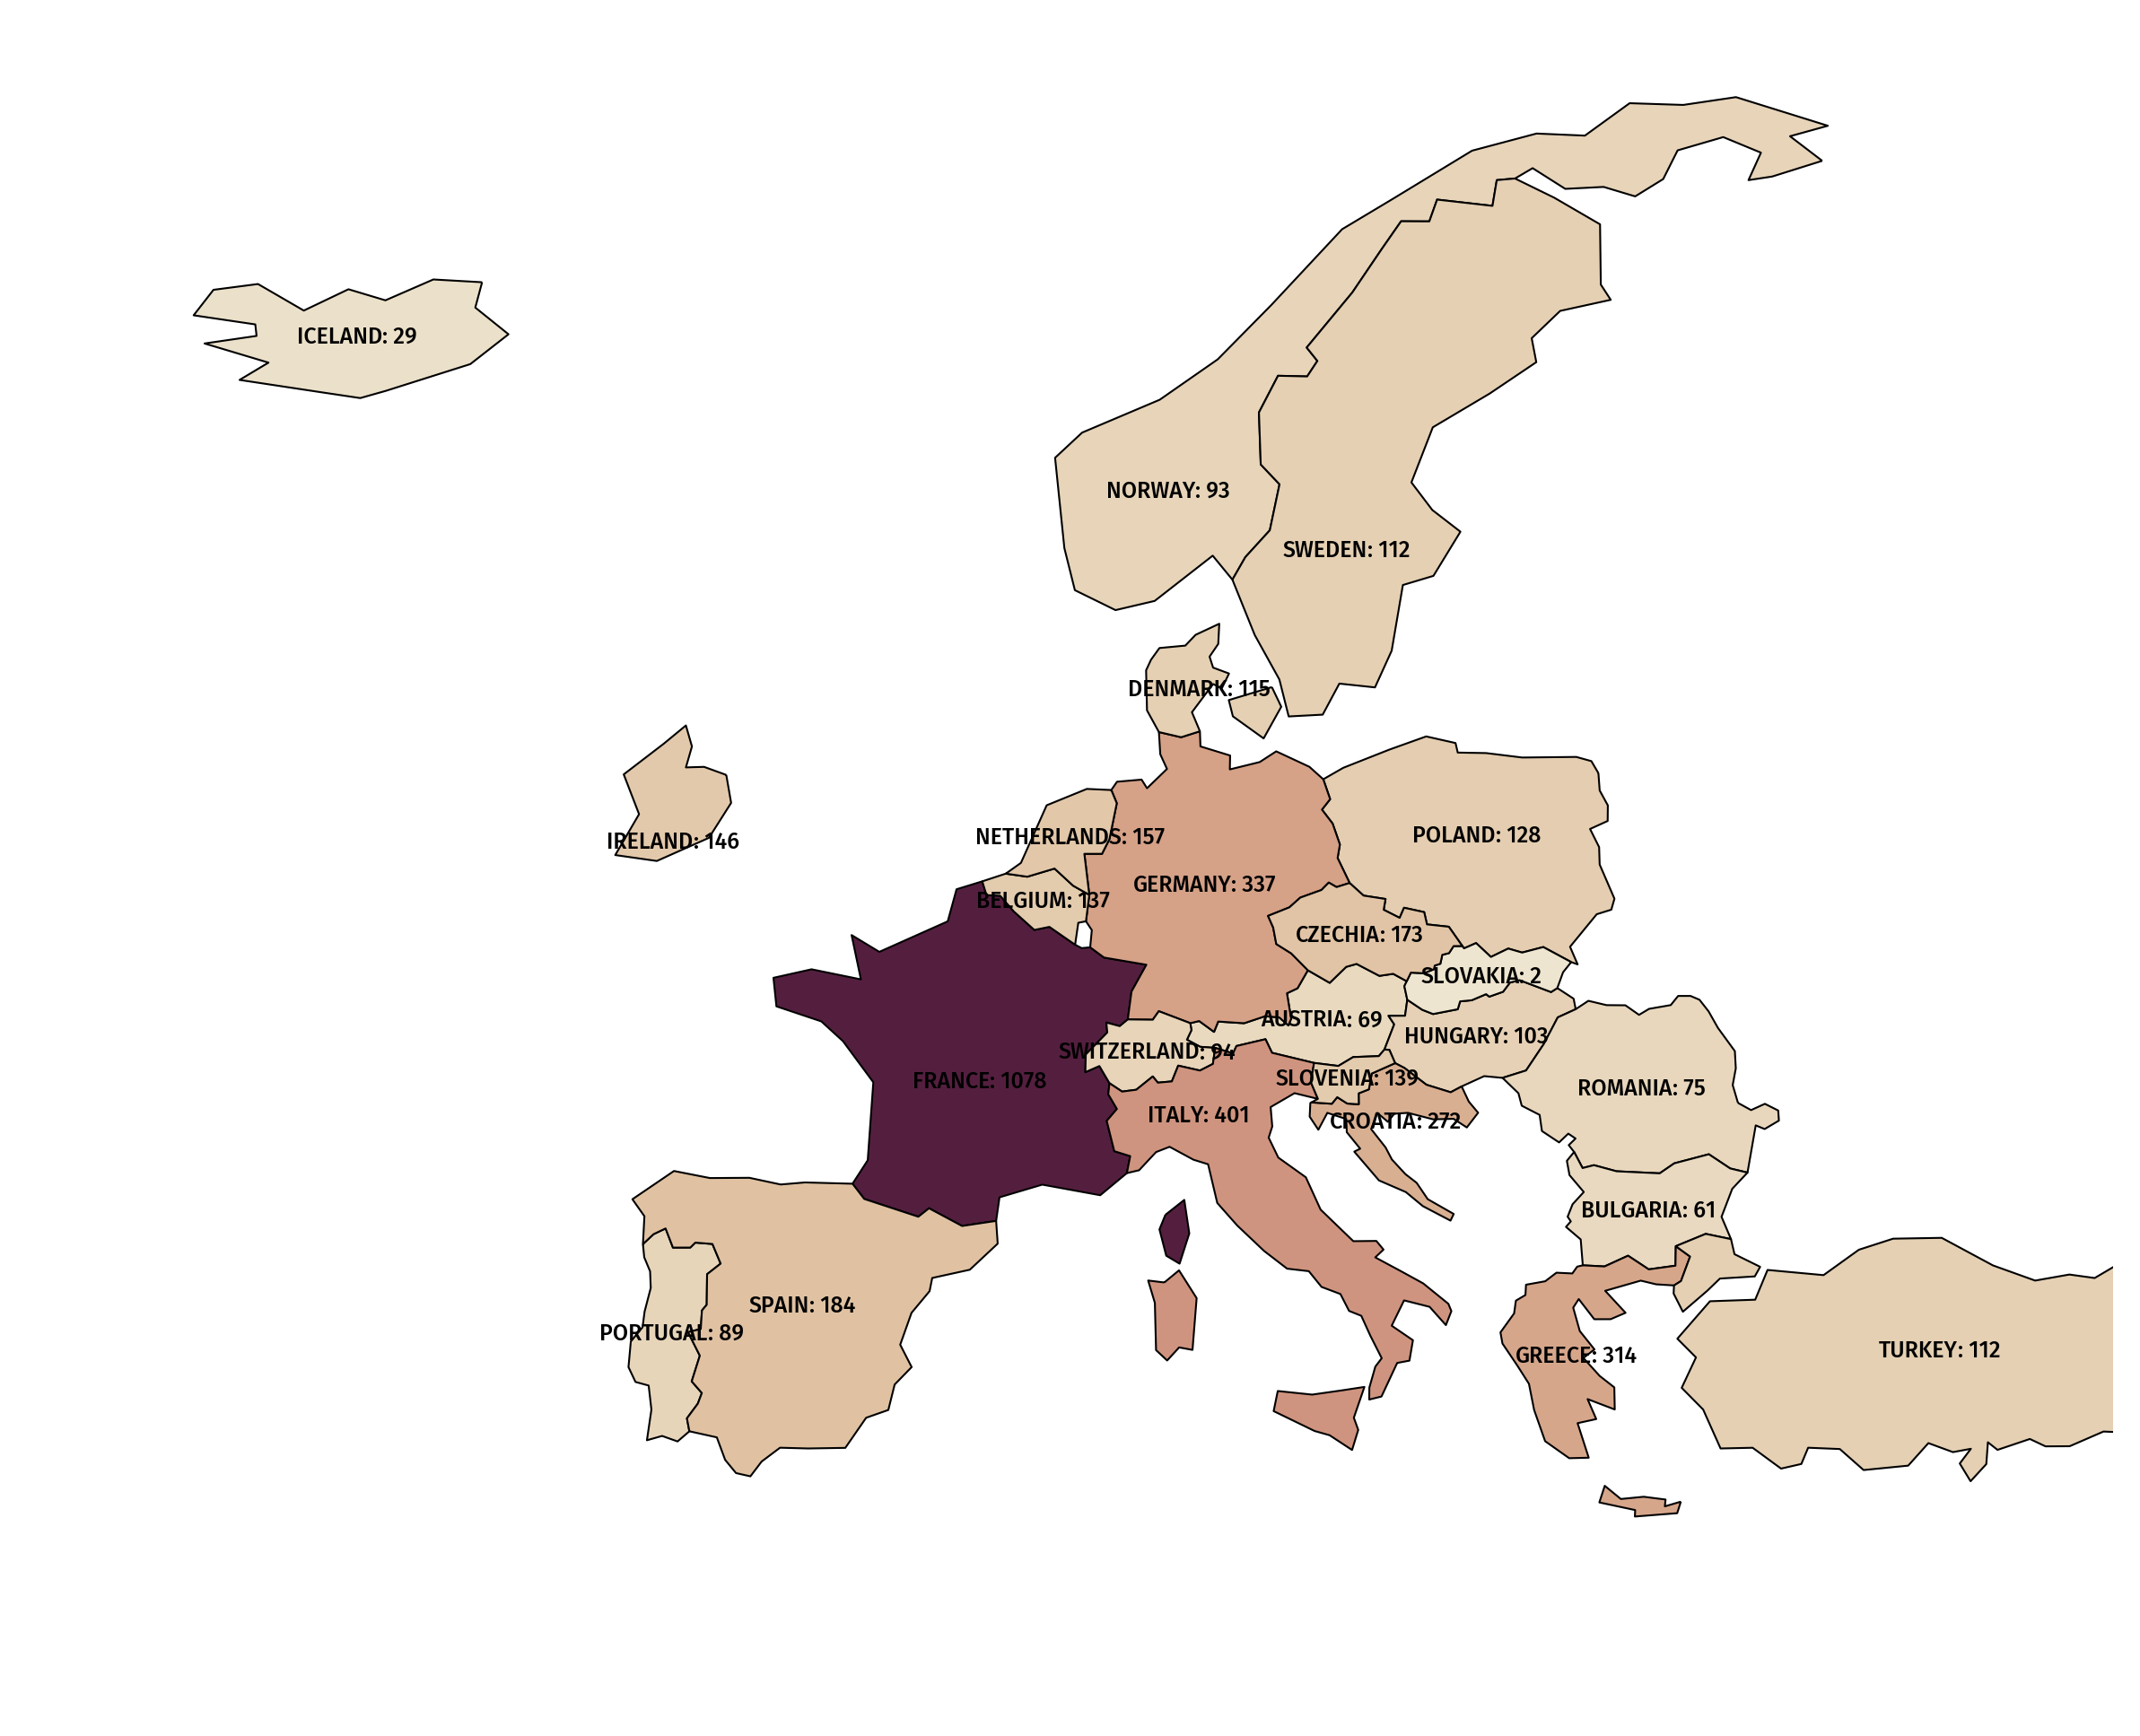

In [84]:
cmap = load_cmap('BrwnYl', cmap_type='continuous')
background_color = 'white'
text_color = 'black'


font = load_font(
   'https://github.com/dharmatype/Bebas-Neue/blob/master/fonts/BebasNeue(2018)ByDhamraType/ttf/BebasNeue-Regular.ttf?raw=true'
)
other_font = load_font(
   'https://github.com/bBoxType/FiraSans/blob/master/Fira_Sans_4_3/Fonts/Fira_Sans_TTF_4301/Normal/Roman/FiraSans-Light.ttf?raw=true'
)
other_bold_font = load_font(
   'https://github.com/bBoxType/FiraSans/blob/master/Fira_Sans_4_3/Fonts/Fira_Sans_TTF_4301/Normal/Roman/FiraSans-Medium.ttf?raw=true'
)



fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black', linewidth=0.5)

ax.set_xlim(-30, 41)
ax.set_ylim(30, 73)
ax.set_axis_off()



data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)

countries_to_annotate = [
       'Slovakia', 'Romania', 'Bulgaria', 'Czechia', 'Denmark',
       'Hungary', 'Greece', 'Belgium', 'Ireland', 'Austria', 'Switzerland',
       'Italy', 'Netherlands', 'Poland', 'Slovenia', 'Portugal', 'Spain',
       'Norway', 'Germany', 'France', 'Sweden', 'Croatia', "Turkey", "Iceland"
]

for country in countries_to_annotate:
   centroid = data.loc[data['name'] == country, 'centroid'].values[0]
   x, y = centroid.coords[0]
   try:
      x += adjustments[country][0]
      y += adjustments[country][1]
   except KeyError:
      pass
   rate = data.loc[data['name'] == country, 'Total'].values[0]
   if rate > 70000:
      color_text = 'white'
   else:
      color_text = text_color # 'black'
   ax_text(
      x=x, y=y, s=f"<{country.upper()}>: {rate:.0f}", fontsize=6, font=other_bold_font, color=color_text,
      ha='center', va='center', ax=ax, highlight_textprops=[{'font': other_bold_font}]
   )

plt.savefig('isolates.png', dpi=300)
plt.show()